In [49]:
import analysis
import pandas as pd

In [58]:
from analysis import Analysis

analysis = Analysis(link = '../Cora_macrosub_manager_logger_file_1673355505.3510218.txt', type ='macro', dataset='Cora', nr_layers=2)

In [59]:
cora_df = analysis.return_df_macro()

In [60]:
cora_df

,actions,val,layer_1,agg_1,acc_1,att_1,hidd_dim_1,layer_2,agg_2,acc_2,att_2,hidd_dim_2
0,"[gcn, max, elu, 2, 8, const, mean, leaky_relu,...",0.310,gcn,max,elu,2,8,const,mean,leaky_relu,4,7
1,"[gat_sym, max, relu6, 16, 256, const, max, lea...",0.782,gat_sym,max,relu6,16,256,const,max,leaky_relu,6,7
2,"[linear, mean, sigmoid, 8, 32, gcn, mlp, tanh,...",0.306,linear,mean,sigmoid,8,32,gcn,mlp,tanh,2,7
3,"[gat, mean, sigmoid, 2, 4, gcn, max, leaky_rel...",0.310,gat,mean,sigmoid,2,4,gcn,max,leaky_relu,16,7
4,"[gat_sym, sum, elu, 8, 256, gat, sum, leaky_re...",0.830,gat_sym,sum,elu,8,256,gat,sum,leaky_relu,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,"[const, mean, elu, 4, 16, gcn, mlp, leaky_relu...",0.842,const,mean,elu,4,16,gcn,mlp,leaky_relu,2,7
1506,"[const, max, linear, 2, 128, linear, mlp, line...",0.850,const,max,linear,2,128,linear,mlp,linear,4,7
1507,"[const, sum, elu, 4, 32, gcn, sum, elu, 4, 7]",0.860,const,sum,elu,4,32,gcn,sum,elu,4,7
1508,"[gat, sum, elu, 4, 8, generalized_linear, mlp,...",0.818,gat,sum,elu,4,8,generalized_linear,mlp,linear,8,7


In [61]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

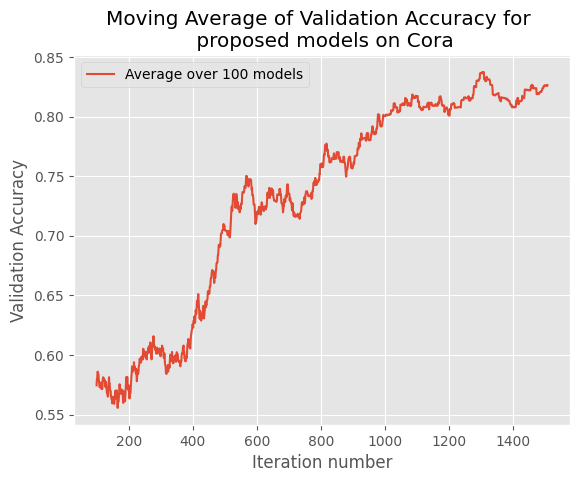

In [62]:
df = cora_df

plt.plot(df['val'].rolling(100).mean(),label= 'Average over 100 models')

plt.legend(loc='best')
plt.title('Moving Average of Validation Accuracy for \n proposed models on ' + analysis.dataset)
plt.ylabel("Validation Accuracy")
plt.xlabel("Iteration number")
#plt.show()
plt.savefig("../plots/moving_average_"+analysis.dataset+ "_"+analysis.type+".jpg")

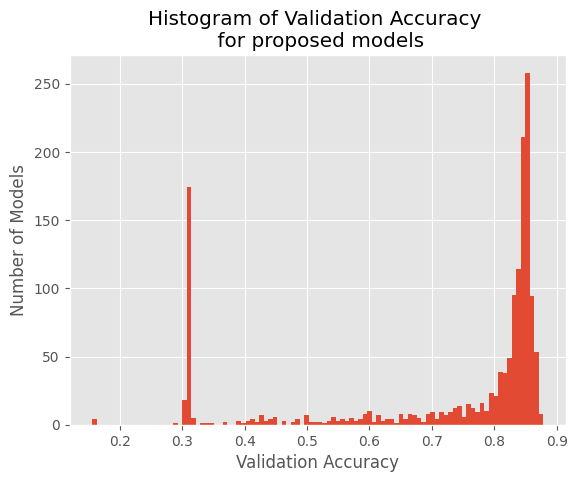

In [63]:
plt.hist(df['val'], bins=100)
plt.title("Histogram of Validation Accuracy \n for proposed models")
plt.xlabel("Validation Accuracy")
plt.ylabel("Number of Models")
plt.savefig("../plots/histogram_"+analysis.dataset+ "_"+analysis.type+".jpg")
#plt.show()

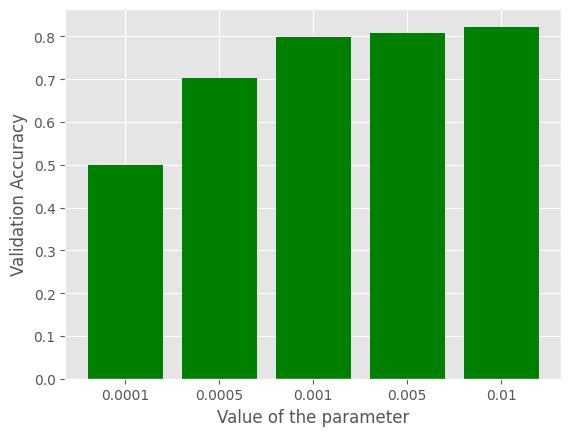

In [58]:
A = analysis.analise_over_action('h_1', df)

x = A.index
energy = A['val']
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.ylabel("Validation Accuracy")
plt.xlabel("Value of the parameter")
plt.title("")

plt.xticks(x_pos, x)

plt.show()